<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/A_Beginner's_Guide_to_Linear_Regression_in%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
#Load the dataset as a dataframe using pandas 
df = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/USA_Housing.csv")

#View the first five rows of the dataframe
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Check the structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#Check summary statistics of numeric columns
round(df.describe(),1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,68583.1,6.0,7.0,4.0,36163.5,1232072.7
std,10658.0,1.0,1.0,1.2,9925.7,353117.6
min,17796.6,2.6,3.2,2.0,172.6,15938.7
25%,61480.6,5.3,6.3,3.1,29403.9,997577.1
50%,68804.3,6.0,7.0,4.0,36199.4,1232669.4
75%,75783.3,6.7,7.7,4.5,42861.3,1471210.2
max,107701.7,9.5,10.8,6.5,69621.7,2469065.6


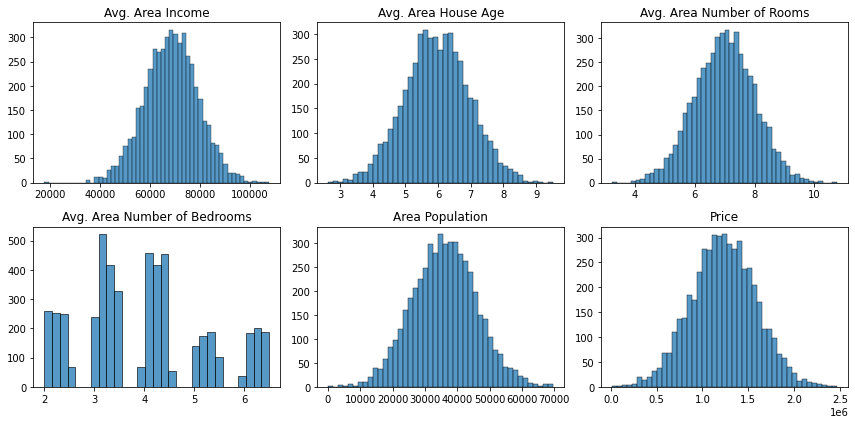

In [6]:
#Create a list object with names of all numeric columns
numeric_cols = df.columns[:-1]

#Create a subplots object with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=[12,6])

#Iterate through the sub plots and plot a histogram for each column
for col,ax in zip(numeric_cols,axes.ravel()):
  sns.histplot(df[col],ax=ax).set(title=col,ylabel="",xlabel="")

#Space out the plots
plt.tight_layout()

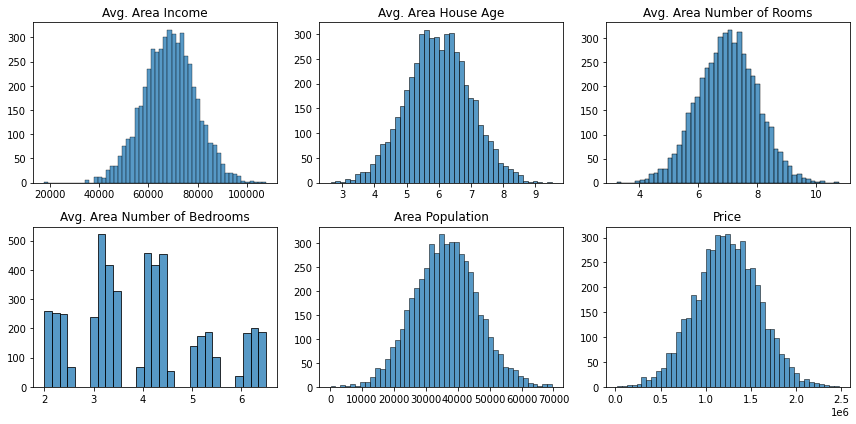

In [7]:
numeric_cols = df.columns[:-1]


plt.figure(figsize=[12,6])

for i, col in enumerate(numeric_cols):
  ax = plt.subplot(2,3, i + 1)
  sns.histplot(df[col],ax=ax).set(title=col,ylabel="",xlabel="")
  plt.tight_layout()


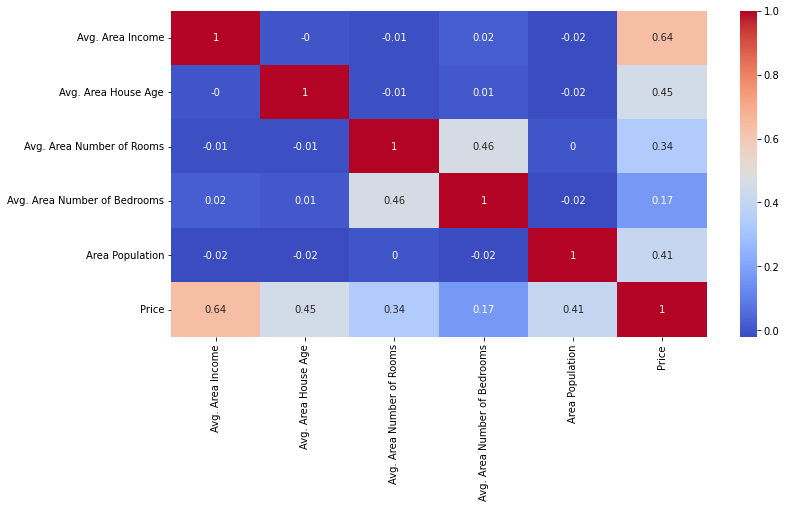

In [8]:
#Create a correlation matrix for all numeric variables
corr_matrix = round(df.corr(),2)

#Create a heatmap and pass in the matrix as the data argument
plt.figure(figsize=[12,6])
sns.heatmap(data = corr_matrix, cmap="coolwarm",annot=True)
plt.show()

In [9]:
#Create a subset of the data frame containing the independent variables
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
#Create a subset of the data frame containing the dependent or target variable
y = df["Price"]

In [10]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [11]:
#Create a linear regression object
linear_model = LinearRegression()

#Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Print out the intercept for the model
print(linear_model.intercept_)

-2630610.092919048


In [13]:
#Create a dataframe of the coefficients for each variable
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coeff'])

#Print the first five rows
coefficients.head()

,Coeff
Avg. Area Income,21.573980
Avg. Area House Age,165392.853202
Avg. Area Number of Rooms,118869.897335
Avg. Area Number of Bedrooms,3361.027931
Area Population,15.250554


In [14]:
#Make predictions using the test data
predictions = linear_model.predict(X_test)
print(predictions)

[ 791526.30225025  697042.61469372 1414304.39991646 ... 1584947.86762344
 1555729.53309838 1125480.68126171]


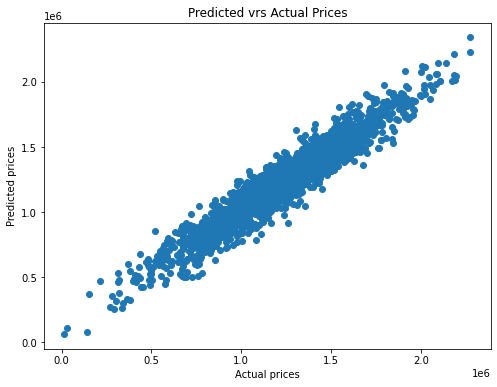

In [15]:
#Create a scatter plot of predicted vrs. actual values
plt.figure(figsize=[8,6])
plt.scatter(y_test, predictions)
plt.title("Predicted vrs Actual Prices")
plt.ylabel("Predicted prices")
plt.xlabel("Actual prices")
plt.show()

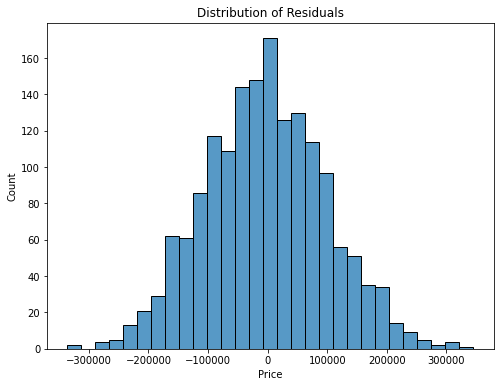

In [16]:
#Plot a histogram of the residuals
plt.figure(figsize=[8,6])
sns.histplot(y_test-predictions).set(title="Distribution of Residuals")
plt.show()

In [18]:
#Calculate the evaluation metrics
print(f"The Mean Absolute Error is {round(mean_absolute_error(y_test,predictions))}")
print(f"The Mean Squared Error is {round(mean_squared_error(y_test,predictions))}")
print(f"The Root Mean Squared Error is {round(np.sqrt(mean_squared_error(y_test,predictions)))}")
print(f"The Adjusted R-Squared is {round(1 - (1 - r2_score(y_test, predictions)) * (len(y) - 1) / (len(y) - X.shape[1] - 1),2)}")

The Mean Absolute Error is 81801
The Mean Squared Error is 10509340063
The Root Mean Squared Error is 102515
The Adjusted R-Squared is 0.92
